## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##  Load and Explore the Dataset

In [2]:
# Load the dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

# Display the first few rows
print(california_df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


## Data Preprocessing

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

C:\Users\biost\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


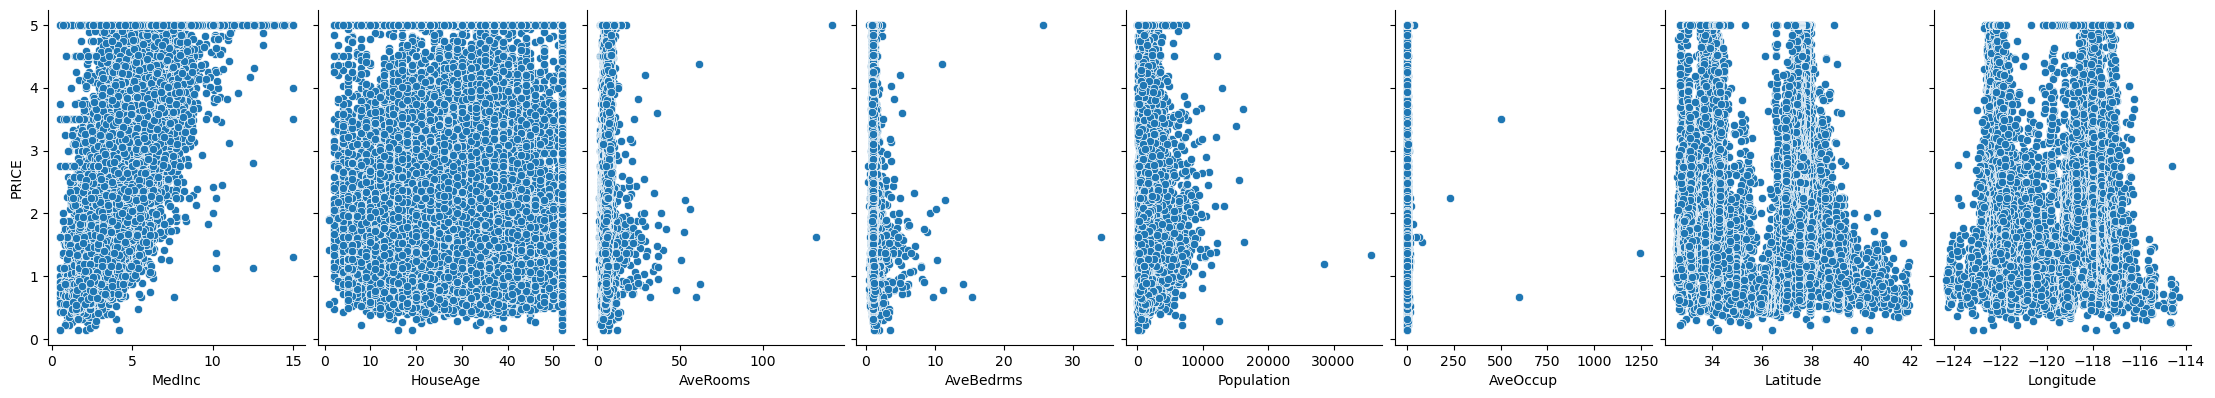

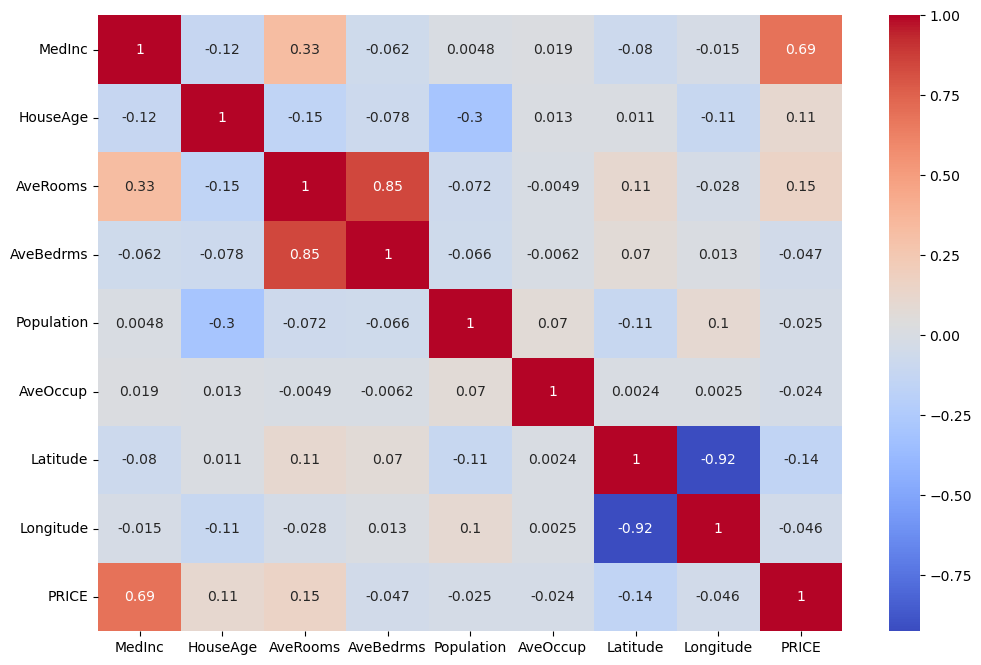

In [3]:
# Check for missing values
print(california_df.isnull().sum())

# Data summary
print(california_df.describe())

# Visualize the relationship between features and target
sns.pairplot(california_df, x_vars=california.feature_names, y_vars='PRICE', height=4, aspect=0.7, kind='scatter')
plt.show()

# Correlation matrix
corr_matrix = california_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


##  Split the Data into Training and Testing Sets

In [4]:
X = california_df.drop('PRICE', axis=1)
y = california_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Linear Regression Model

In [5]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model

In [6]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

Training MSE: 0.5179331255246696
Testing MSE: 0.5558915986952445
Training R^2: 0.6125511913966953
Testing R^2: 0.5757877060324507


## Visualize the Results

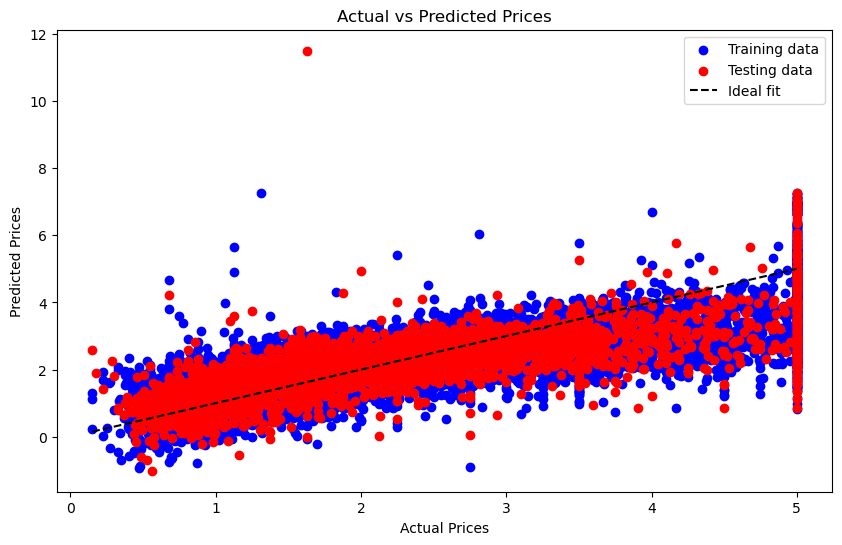

In [7]:
# Plot predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', label='Ideal fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()
